# Data Analysis: Cell frequency analysis

In this vignette we showcase FACSPy functionality in order to get a quick overview over the sample metrics.

This will include cell counts and gate frequencies.

First, we import the necessary library and load the dataset we created in the previous vignette.

In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp

In [3]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/mouse_lineages",
                          file_name = "raw_dataset")
dataset

AnnData object with n_obs × n_vars = 3212862 × 20
    obs: 'staining', 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'settings', 'pca_CD45+_transformed', 'pca_CD45+_logicle'
    obsm: 'X_pca_CD45+_logicle', 'X_pca_CD45+_transformed', 'gating'
    varm: 'pca_CD45+_logicle', 'pca_CD45+_transformed'
    layers: 'compensated', 'logicle', 'transformed'

Since we do not need the unstained samples anymore, we will exclude them.

Here, we subset the dataset and will synchronize the metadata in the .uns slot.

In [4]:
dataset = dataset[dataset.obs["staining"] != "unstained",:].copy()
fp.sync.synchronize_dataset(dataset)

Found modified subsets: ['adata_obs_names', 'adata_sample_ids']
	... synchronizing metadata object to contain sample_IDs of the dataset


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


In [5]:
dataset.uns["metadata"].to_df()

,sample_ID,file_name,organ,genotype,sex,experiment,age,staining
10,11,21112023_lineage_BM_M10_014.fcs,BM,neg,f,2,95,stained
11,12,21112023_lineage_BM_M11_015.fcs,BM,pos,m,2,95,stained
12,13,21112023_lineage_BM_M12_016.fcs,BM,pos,m,2,95,stained
13,14,21112023_lineage_BM_M7_011.fcs,BM,neg,f,2,95,stained
14,15,21112023_lineage_BM_M8_012.fcs,BM,pos,f,2,95,stained
15,16,21112023_lineage_BM_M9_013.fcs,BM,neg,f,2,95,stained
18,19,22112023_lineage_BM_M13_011.fcs,BM,pos,m,3,96,stained
19,20,22112023_lineage_BM_M14_012.fcs,BM,pos,m,3,96,stained
20,21,22112023_lineage_BM_M15_013.fcs,BM,pos,m,3,96,stained
21,22,22112023_lineage_BM_M16_014.fcs,BM,neg,f,3,96,stained


## Cell Count analysis

We first plot the raw cell counts using the `fp.pl.cell_counts()`. As with every visualization plot, we pass a gate to specify which population to analyze. Note the vignette 'FACSPy gate handling' for further information on how to handle gates.

You can specify a full gate path, a partial gate path or just the final population.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


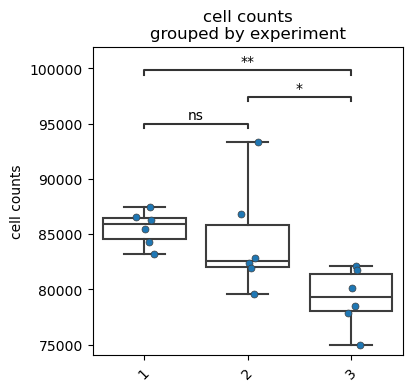

In [6]:
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "experiment",
                  figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


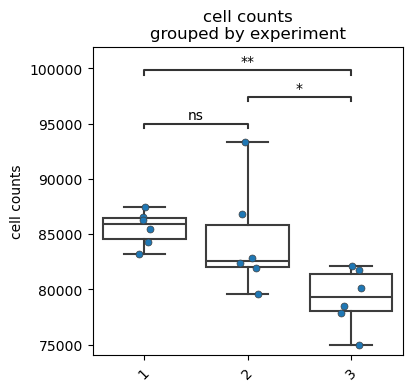

In [7]:
fp.pl.cell_counts(dataset,
                  gate = 'root/cells/singlets/live/CD45+',
                  groupby = "experiment",
                  figsize = (4,4))

Further customization of the plot is possible. Here, we use the `splitby` parameter in order to visualize potential differences between the sexes.

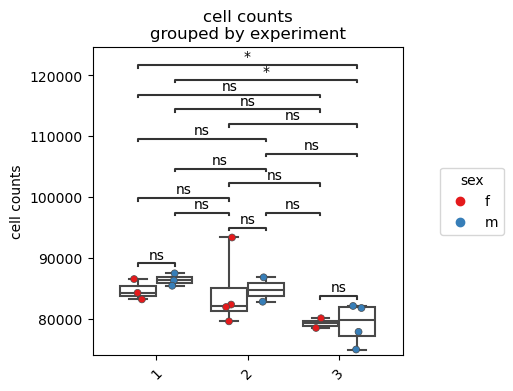

In [8]:
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "experiment",
                  splitby = "sex",
                  figsize = (4,4))

## Gate frequency analysis

One of the most common analysis in cytometry is the quantification of gates. We first calculate the gate frequencies using the `fp.tl.gate_frequencies()` function.

In [9]:
fp.tl.gate_frequencies(dataset)

For visualization, we use the `fp.pl.gate_frequency()` function. We specify the gate as well as the parent we want to visualize.  

For the freq_of parameter, valid inputs are 'parent', 'grandparent', 'all' or a gate.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


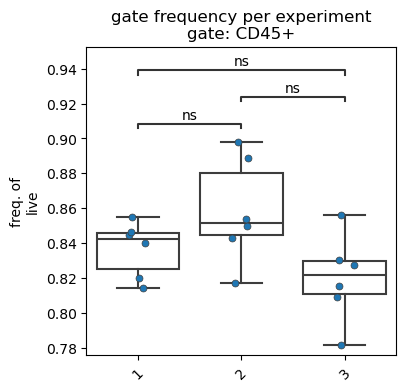

In [10]:
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     freq_of = "parent",
                     groupby = "experiment",
                     figsize = (4,4))

Similar to the cell count plot, we can further customize the data graph.

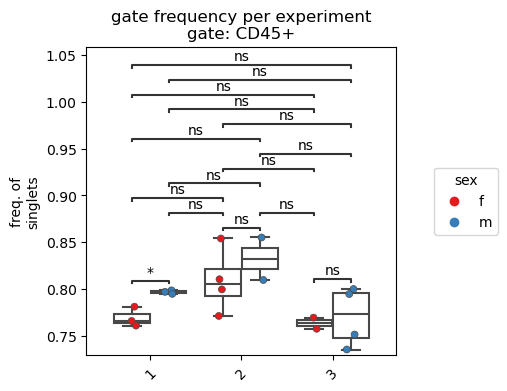

In [11]:
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     groupby = "experiment",
                     splitby = "sex",
                     freq_of = "grandparent",
                     figsize = (4,4))

## Save the dataset

Since we performed the gate frequency analysis, we save the dataset.

In [12]:
fp.save_dataset(dataset,
                output_dir = "../../Tutorials/mouse_lineages/",
                file_name = "raw_dataset_stained",
                overwrite = True)

File saved successfully
